In [1]:
# Import Dependencies
import glob
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Unpickle Data [Train + Test]
def load_data(file):
    with open(file,'rb') as f:
        cifar_dict = pickle.load(f, encoding='bytes')
    return cifar_dict

In [3]:
# Load Data
dataset = [0,1,2,3,4,5,6]
i = 0
for files in glob.glob('./cifar-10-batches-py/*'):
    dataset[i] = load_data(files)
    i += 1

In [4]:
# Separate data into training and test
batches = dataset[0]
data_batch1 = dataset[1]
data_batch2 = dataset[2]
data_batch3 = dataset[3]
data_batch4 = dataset[4]
data_batch5 = dataset[5]
test_data = dataset[6]

In [5]:
# Metadata for Dataset
batches

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [6]:
data_batch1.keys()

dict_keys([b'filenames', b'data', b'batch_label', b'labels'])

**data:** 10000 x 3072 numpy array. Each row of array stores a 32 x 32 color image. First 1024 entries contain **red channel** values, the second 1024 entries contain **green channel** values and the third one has the **blue channel** values.

**labels:** 10,000 values with range 0 to 9.

In [7]:
# Check the Shape and Size of Images
data_batch1[b'data'].shape

(10000, 3072)

In [8]:
# Size of a single image
data_batch1[b'data'][0].shape

(3072,)

We have a set of 10,000 images i.e. 10,000 rows. The columns value 3072 is derived from the fact that each image is a 32 x 32 RGB image. 

So, size of an RGB Image:

**32 x 32 x 3 => 3072**, 

where, 3 is the number of channels for an RGB image.

Since, the iamges are present in forms of RGB pixels across the rows, we will reshape them into a Matrix of pixel values i.e.

**3072  =>  32 x 32 x 3**

In [9]:
# Display a single image
# Load image and reshape
X = data_batch1[b'data']
X = X.reshape(10000,3,32,32).transpose(0,2,3,1).astype('uint8')

In [10]:
# Shape of single image after processing
X[0].shape

(32, 32, 3)

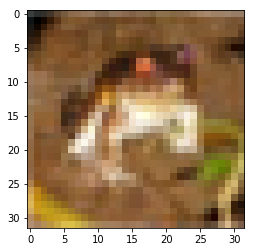

In [11]:
# Plot single image
plt.imshow(X[0])

### Why use Reshape and Transpose ?

In [12]:
# Reshape IMage by Image
X = data_batch1[b'data']

In [13]:
all_images = X.reshape(10000,3,32,32)

In [14]:
sample_image = all_images[0]

In [15]:
sample_image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ..., 
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ..., 
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ..., 
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [16]:
sample_image.shape

(3, 32, 32)

Since, the image using the simple reshape without transpose has a shape of **3,32,32** which is not accepted by the matplotlib's plt.imshow() function, so we need to take a transpose of the image data to convert it from:

**(3,32,32)  =>  (32,32,3)**

In [17]:
# Tranpose the image
# Take value at axis 1 and 2 in original image i.e. 32,32 to axis 0 and 1.  =>  (3,32,32)  => (32,32,)
# Take value from axis 0 to axis 2 i.e. 3 to axis 2. =>  (3,32,32)  => (32,32,3)
sample_image.transpose(1,2,0)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

In [18]:
sample_image.transpose(1,2,0).shape

(32, 32, 3)

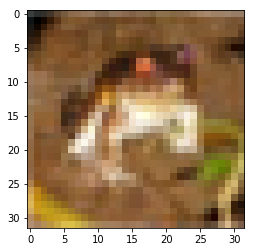

In [19]:
plt.imshow(sample_image.transpose(1,2,0))

## Helper Functions

In [21]:
# One Hot Encoding for Labels
def one_hot_encode(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [22]:
class CifarHelper():
    
    def __init__(self):
        self.train_data = [data_batch1, data_batch2, data_batch3, data_batch4, data_batch5]
        self.test_data = [test_data]
        
        # Initialize Variables
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    # Normalize and Reshape Images
    def set_up_images(self):
        print('Setting up Training Images and Lables !!')
        
        # Vertically stack training images
        self.training_images = np.vstack([d[b'data'] for d in self.train_data])
        train_len = len(self.training_images)
        
        # Reshape and Normalize Training Images
        self.training_images = self.training_images.reshape(train_len, 3, 32, 32).transpose(0,2,3,1) / 255
        self.training_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.train_data]))
        
        print('Setting up Test Images and Lables !!')
        
        # Vertically stack training images
        self.test_images = np.vstack([d[b'data'] for d in self.test_data])
        test_len = len(self.test_images)
        
        # Reshape and Normalize Training Images
        self.test_images = self.test_images.reshape(test_len, 3, 32, 32).transpose(0,2,3,1) / 255
        self.test_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.test_data]), 10)
    
    # Make Data Batches
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y